# Machine Learning: Regression - Predicting 
# Energy Efficiency of Buildings
## Stage B quiz
The dataset is an Appliances Energy Prediction data. The data set is at 10 min for about 4.5 months. 
The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. 
Each wireless node transmitted the temperature and humidity conditions around 3.3 min. 
Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. 
Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. 
Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters). 
The attribute information can be seen below.

Attribute Information:
 - Date, time year-month-day hour:minute:second
 - Appliances, energy use in Wh
 - lights, energy use of light fixtures in the house in Wh
 - T1, Temperature in kitchen area, in Celsius
 - RH_1, Humidity in kitchen area, in %
 - T2, Temperature in living room area, in Celsius
 - RH_2, Humidity in living room area, in %
 - T3, Temperature in laundry room area
 - RH_3, Humidity in laundry room area, in %
 - T4, Temperature in office room, in Celsius
 - RH_4, Humidity in office room, in %
 - T5, Temperature in bathroom, in Celsius
 - RH_5, Humidity in bathroom, in %
 - T6, Temperature outside the building (north side), in Celsius
 - RH_6, Humidity outside the building (north side), in %
 - T7, Temperature in ironing room , in Celsius
 - RH_7, Humidity in ironing room, in %
 - T8, Temperature in teenager room 2, in Celsius
 - RH_8, Humidity in teenager room 2, in %
 - T9, Temperature in parents room, in Celsius
 - RH_9, Humidity in parents room, in %
 - To, Temperature outside (from Chievres weather station), in Celsius
 - Pressure (from Chievres weather station), in mm Hg
 - RH_out, Humidity outside (from Chievres weather station), in %
 - Wind speed (from Chievres weather station), in m/s
 - Visibility (from Chievres weather station), in km
 - Tdewpoint (from Chievres weather station), Â °C
 - rv1, Random variable 1, nondimensional
 - rv2, Random variable 2, nondimensional

### Importing useful libraries and Dataset

In [1]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('energydata_complete.csv') #imports the dataset

In [3]:
Energy_data = df.drop(columns=['date', 'lights']) #drops columns that are not needed for analysis

In [4]:
Energy_data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
Energy_data.describe()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


## Collinearity
It can be deduced that there's no multicollinearity with the predictor "Appliances"

Text(0.5, 1, 'Correlation of Variables')

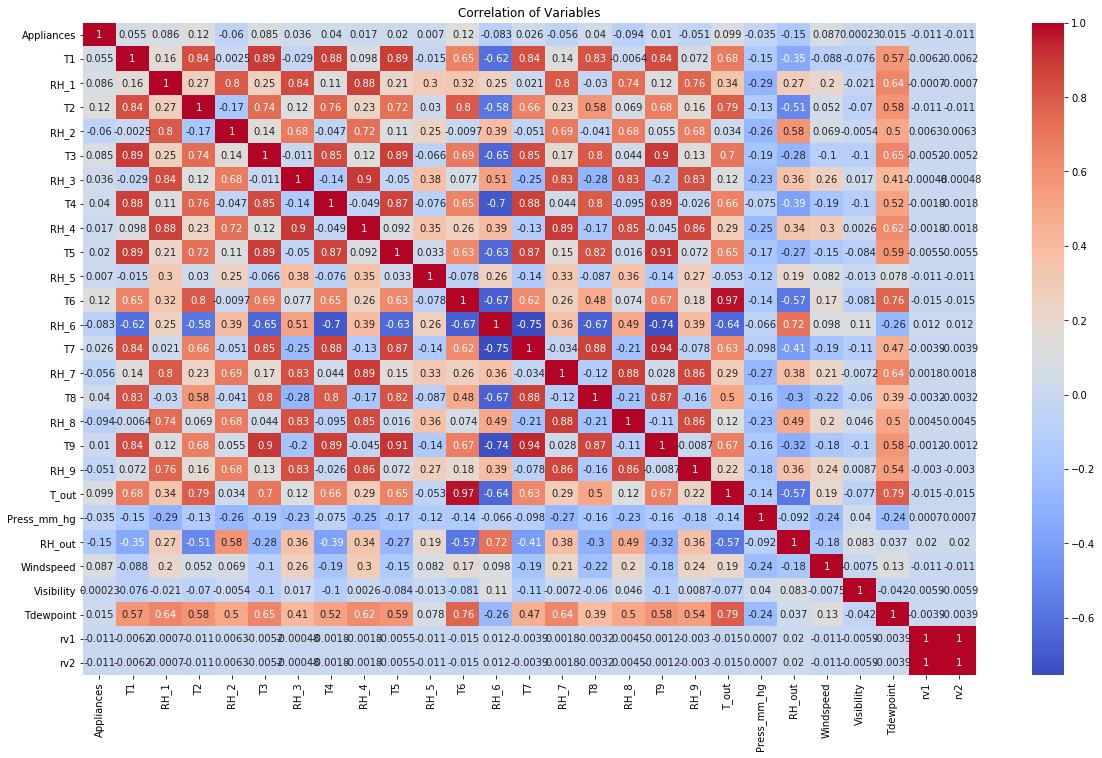

In [6]:
#Plotting heatmap to further verify correlations
plt.figure(figsize=(20,12)) #size increment
sns.heatmap(Energy_data.corr(), cmap = "coolwarm", annot=True)
plt.title('Correlation of Variables')

## Feature Scaling using Minmax Scaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#normalised_feature = pd.DataFrame(scaler.fit_transform(feature_x), columns=feature_x.columns)
normalised_df = pd.DataFrame(scaler.fit_transform(Energy_data), columns=Energy_data.columns)
normalised_features = normalised_df['T2']
predictor_y = normalised_df['T6']

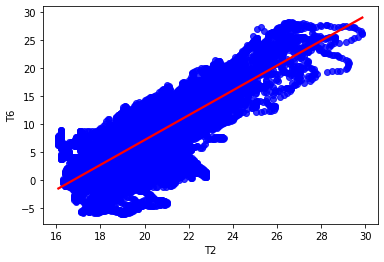

In [8]:
sns.regplot(x="T2", y="T6",data=Energy_data, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

## Dataset split

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalised_features.values.reshape(-1,1),predictor_y, test_size=0.3, random_state=42)

## Training the model

In [10]:
from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression()

#fit the model to the training dataset
Linear_model.fit(x_train, y_train)
predicted_values = Linear_model.predict(x_test)
Linear_model.coef_

array([0.8910771])

#### Error metrics computation

In [11]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.64

In [12]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.08

In [13]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

66.12

In [14]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.106

### Regularised models

In [15]:
#Regularisation of the model to prevent overfit or underfit
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [16]:
predicted_values = ridge_reg.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.106

In [17]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
predicted_values = lasso_reg.predict(x_test)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.106

In [19]:
lasso_reg.coef_

array([0.85177991])